# Análise da Violência Doméstica em MG contra a Mulher em 2022

Análise exploratória dos dados da violência doméstica contra a mulher disponibilizado pela Policia Cívil de Minas Gerais

Dados: https://dados.mg.gov.br/dataset/ab7e00b6-a8ae-4426-8809-85e23f3f6b6f/resource/3075b898-19f0-4769-ab8e-2f56cabfd7ba/download/violencia_domestica_2022.csv

In [2]:
import pandas as pd
import plotly.graph_objects as go
import datetime
import numpy as np

In [3]:
#carregando o dataset
df=pd.read_csv('data/violencia_domestica_2022.csv',sep=';')

In [4]:
df.head()

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,3) Interior de MG,AMEACA,CONSUMADO,1
2,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
3,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,3) Interior de MG,AMEACA,CONSUMADO,1


Vamos tirar as colunas municipio_cod e risp pois elas não farão parte da análise e acoluna ano também

In [5]:
#tirando as colunas municipio_cod,risp e 
df=df.drop(['municipio_cod','risp','ano'],axis=1)

In [6]:
df.head()

,municipio_fato,data_fato,mes,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,ABADIA DOS DOURADOS,2022-01-01,1,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
1,ABAETE,2022-01-01,1,3) Interior de MG,AMEACA,CONSUMADO,1
2,ABRE-CAMPO,2022-01-01,1,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1
3,ABRE-CAMPO,2022-01-01,1,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
4,AGUAS FORMOSAS,2022-01-01,1,3) Interior de MG,AMEACA,CONSUMADO,1


In [7]:
df.shape
#vemos que o dataset possui 7 colunas e 101872 linhas

(101872, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101872 entries, 0 to 101871
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   municipio_fato     101872 non-null  object
 1   data_fato          101872 non-null  object
 2   mes                101872 non-null  int64 
 3   rmbh               101872 non-null  object
 4   natureza_delito    101872 non-null  object
 5   tentado_consumado  101872 non-null  object
 6   qtde_vitimas       101872 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.4+ MB


In [9]:
#vamos transformar a coluna data_fato para data
df['data_fato']=pd.to_datetime(df['data_fato'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101872 entries, 0 to 101871
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   municipio_fato     101872 non-null  object        
 1   data_fato          101872 non-null  datetime64[ns]
 2   mes                101872 non-null  int64         
 3   rmbh               101872 non-null  object        
 4   natureza_delito    101872 non-null  object        
 5   tentado_consumado  101872 non-null  object        
 6   qtde_vitimas       101872 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.4+ MB


In [11]:
#checando se tem valores nulos
df.isnull().sum()

municipio_fato       0
data_fato            0
mes                  0
rmbh                 0
natureza_delito      0
tentado_consumado    0
qtde_vitimas         0
dtype: int64

### Analisando o dataset

##### Questões para se responder:
- Qual o número de vítimas total ?
- Qual o número de vítimas por mes ?
- Qual a média de vítimas por mês ? 
- Qual o município que teve a maior quantidade de vítimas e a menor ?
- Qual o tipo de crime que mais ocorreu ?
- Quais os tipos de delitos que mais ocorreram ?
- Qual dia da semana que mais ocorreu crimes?
- Qual dia que ocorreu a maior quantidade de crimes e a menor ?
- Qual região que teve a maior quantidade de vítimas ?

### Qual o número de vítimas total ?

In [12]:
#contando o número de vítimas
quant_vit=df['qtde_vitimas'].sum()
quant_vit

140061

No ano de 2022, houve cerca de 140.061 vítimas de violência doméstica em Minas Gerais

### Qual o número de vítimas por mes ?

In [13]:
#fazendo o agrupamanto por mes somando a quantidade de vítimas
df_mes=df.groupby(['mes'])['qtde_vitimas'].sum()

In [14]:
df_mes.sort_values(ascending=False)

mes
10    13049
3     12474
12    12134
4     12026
8     11882
9     11876
1     11804
7     11417
11    11144
5     10899
2     10818
6     10538
Name: qtde_vitimas, dtype: int64

O mês que teve a maior quantidade de vítimas foi outubro com 13.049 vítimas

O mês que teve a menor quantidade de vítimas foi junho com 10.538 vítimas

### Qual a média de vítimas por mês ?

In [15]:
#calculando a média de vítimas por mes
media=df_mes.sum()/12
media

11671.75

A média de vítimas por mês é de 11.671,75

### Qual o município que teve a maior quantidade de vítimas e a menor ?

In [16]:
#fazendo o agrupamento por município somando o número de vítimas
df_mun=df.groupby(['municipio_fato'])['qtde_vitimas'].sum()

In [17]:
df_mun.sort_values(ascending=False)

municipio_fato
BELO HORIZONTE                16532
JUIZ DE FORA                   4514
CONTAGEM                       3810
UBERLANDIA                     3737
MONTES CLAROS                  2828
                              ...  
CAMACHO                           3
PASSABEM                          3
TAPIRAI                           3
TOCOS DO MOJI                     2
SAO SEBASTIAO DO RIO VERDE        2
Name: qtde_vitimas, Length: 852, dtype: int64

O município que teve a maior quantidade de vítimas foi Belo Horizonte com 16.532 vítimas, correspondendo a 16,22% do total de vítimas no ano.

Os municípios de São Sebastião do Rio Verde e de Tocos Do Moji que tiveram a menor quantidade de vítimas com apenas 2 vítimas 

### Qual o tipo de crime que mais ocorreu ?

In [18]:
#separando os tipos de crimes
tipo_crime_tentado=len(df.query('tentado_consumado=="TENTADO"'))
tipo_crime_consumado=len(df.query('tentado_consumado=="CONSUMADO"'))


In [19]:
tipo_crime_tentado

924

In [20]:
tipo_crime_consumado

100948

A partir das informações conclui-se que cerca de 99,09 % dos crimes foram consumados

### Quais os tipos de delitos que mais ocorreram ?

In [21]:
#contanto os tipos de delito
tipo_delito=len(df['natureza_delito'].unique())
tipo_delito

188

Ocorreram 188 tipos de delitos diferentes

In [22]:
tipo_delito=df['natureza_delito'].value_counts()
tipo_delito[0:10]

natureza_delito
AMEACA                                                28997
VIAS DE FATO / AGRESSAO                               20155
LESAO CORPORAL                                        16874
DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA         5570
ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLENCIA      3444
DANO                                                   3076
ATRITO VERBAL                                          2108
PERSEGUICAO                                            2054
FURTO                                                  1893
INJURIA                                                1822
Name: count, dtype: int64

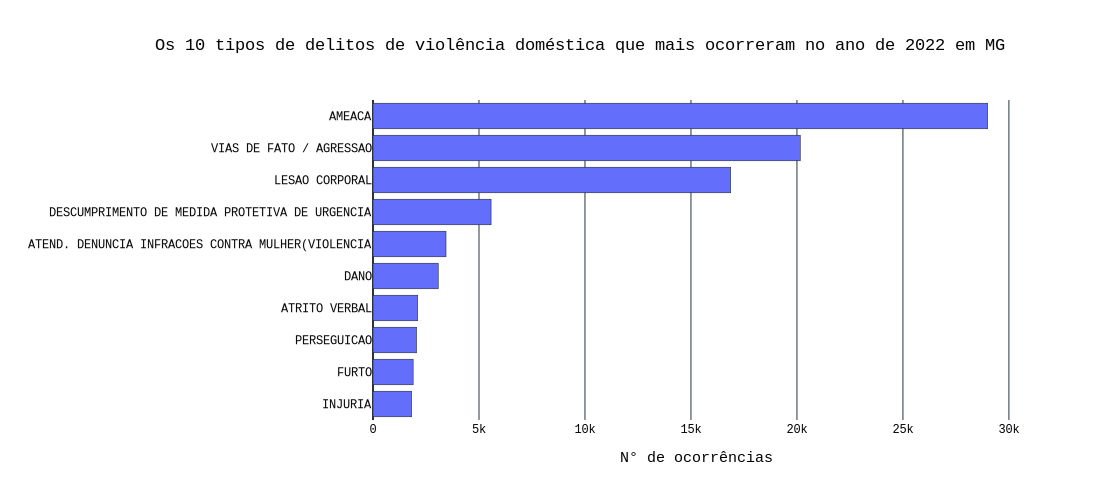

In [56]:
#plotando os 10 tipos de delitos que mais ocorreram

x=tipo_delito[0:10].sort_values(ascending=True)
y=tipo_delito[0:10].sort_values(ascending=True).index
fig1=go.Figure()

fig1.add_trace(go.Bar(x=x,y=y,orientation='h'))
fig1.update_layout(title='Os 10 tipos de delitos de violência doméstica que mais ocorreram no ano de 2022 em MG',
                                title_font=dict(family='Courier New',color='Black'),
                                title_pad=dict(b=2,l=100,r=2,t=2),
                                template='plotly_dark',
                                plot_bgcolor='rgba(0, 0, 0, 0)',
                                paper_bgcolor='rgba(0, 0, 0, 0)',)


fig1.update_xaxes(title=dict(text='N° de ocorrências',font_family='Courier New',font_size=15,font_color='Black'),tickfont=dict(family='Courier New',color='Black'))
fig1.update_yaxes(tickfont=dict(family='Courier New',color='Black'))

fig1.show('svg',width=1100)

Observando o gráfico nota-se que a ameaça foi o tipo de delito que mais ocorreu e injuria foi o que menos ocorreu entre os 10.

### Qual dia que ocorreu a maior quantidade de crimes e o menor ?

In [24]:
df_dia=df.groupby('data_fato')['qtde_vitimas'].sum()
dia_max=df_dia.idxmax()
quant_max=df_dia.max()
dia_min=df_dia.idxmin()
quant_min=df_dia.min()

In [25]:
print(f'Dia que mais teve vítimas: {dia_max}      Quantidade de vítimas: {quant_max}\nDia que menos teve vítimas: {dia_min}      Quantidade de vítimas: {quant_min}')

Dia que mais teve vítimas: 2022-12-25 00:00:00      Quantidade de vítimas: 631
Dia que menos teve vítimas: 2022-05-19 00:00:00      Quantidade de vítimas: 255


Infelizmente observa-se que no dia do natal foi o maior número de vítimas

### Qual dia da semana que mais ocorreu crimes?

In [26]:
#pegando as datas
data_fds=df['data_fato']
data_fds=list(data_fds)


In [27]:
#função que verifica a data e tranforma em dia da semana
def verifica_fds(data):
    
    dia_da_semana=data.dayofweek
    
    match dia_da_semana:

        case 0:
            dia_da_semana='segunda-feira'
        case 1:
            dia_da_semana='terça-feira'
        case 2:
            dia_da_semana='quarta-feira'
        case 3:
            dia_da_semana='quinta-feira'
        case 4:
            dia_da_semana='sexta-feira'
        case 5:
            dia_da_semana='sabado'
        case 6:
            dia_da_semana='domingo'
    return dia_da_semana


In [28]:
data_day=list()
for i in data_fds:
    data_day.append(verifica_fds(i))

In [29]:
df_modificado=df
df_modificado['dia_fato']=data_day

In [30]:
df_modificado.head()

,municipio_fato,data_fato,mes,rmbh,natureza_delito,tentado_consumado,qtde_vitimas,dia_fato
0,ABADIA DOS DOURADOS,2022-01-01,1,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1,sabado
1,ABAETE,2022-01-01,1,3) Interior de MG,AMEACA,CONSUMADO,1,sabado
2,ABRE-CAMPO,2022-01-01,1,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1,sabado
3,ABRE-CAMPO,2022-01-01,1,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1,sabado
4,AGUAS FORMOSAS,2022-01-01,1,3) Interior de MG,AMEACA,CONSUMADO,1,sabado


In [31]:
df_modificado_mes=df_modificado.groupby('dia_fato')['qtde_vitimas'].sum()

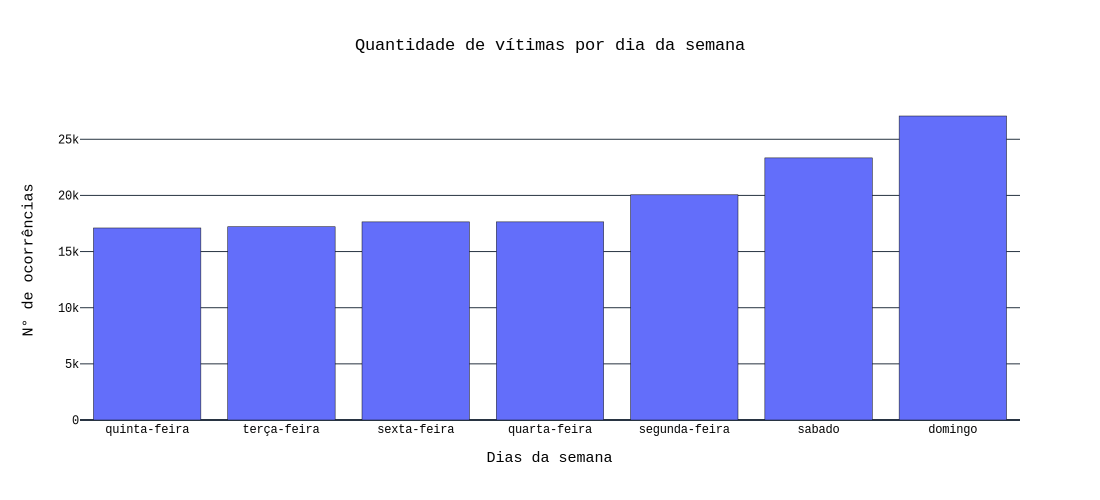

In [57]:
x=df_modificado_mes.sort_values(ascending=True).index
y=df_modificado_mes.sort_values(ascending=True)
fig2=go.Figure()

fig2.add_trace(go.Bar(x=x,y=y))
fig2.update_layout(title='Quantidade de vítimas por dia da semana',
                                title_font=dict(family='Courier New',color='Black'),
                                title_pad=dict(b=2,l=300,r=2,t=2),
                                template='plotly_dark',
                                plot_bgcolor='rgba(0, 0, 0, 0)',
                                paper_bgcolor='rgba(0, 0, 0, 0)',)


fig2.update_xaxes(title=dict(text='Dias da semana',font_family='Courier New',font_size=15,font_color='Black'),tickfont=dict(family='Courier New',color='Black'))
fig2.update_yaxes(title=dict(text='N° de ocorrências',font_family='Courier New',font_size=15,font_color='Black'),tickfont=dict(family='Courier New',color='Black'))

fig2.show('svg',width=1100)

Observando o gráfico nota-se que domingo foi o dia da semana que mais teve vítimas 

### Qual região que teve a maior quantidade de vítimas ?

In [33]:
df_region=df.groupby('rmbh')['qtde_vitimas'].sum()
df_region

rmbh
1) Belo Horizonte     16532
2) RMBH (sem BH)      19108
3) Interior de MG    104421
Name: qtde_vitimas, dtype: int64

O interior de MG foi a região que teve a maior quantidade de vítimas.